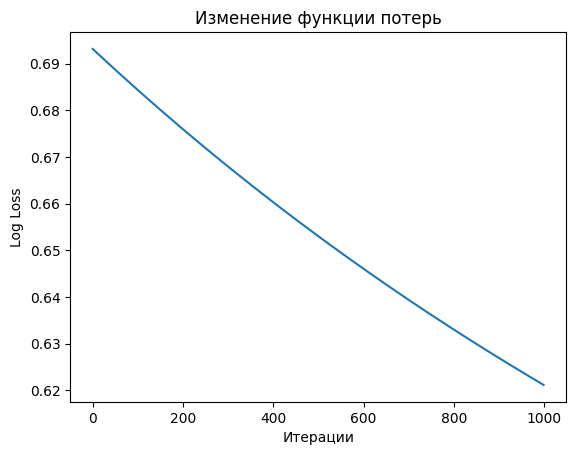

Accuracy: 77.00%


In [1]:
import numpy as np
import matplotlib.pyplot as plt

def log_loss(w, X, y):
    m = X.shape[0]
    z = np.dot(X, w)
    A = 1 / (1 + np.exp(-z))
    
    A = np.clip(A, 1e-15, 1 - 1e-15)
    
    loss = - (1 / m) * np.sum(y * np.log(A) + (1 - y) * np.log(1 - A))
    
    grad = (1 / m) * np.dot(X.T, (A - y))
    
    return loss, grad


def optimize(w, X, y, n_iterations, eta):
    losses = []
    
    for i in range(n_iterations):
        loss, grad = log_loss(w, X, y)
        w = w - eta * grad
        losses.append(loss)
    
    return w, losses


def predict(w, X, b=0.5):
    z = np.dot(X, w) 
    A = 1 / (1 + np.exp(-z))
    
    y_predicted = np.where(A >= b, 1, 0)
    
    return y_predicted



np.random.seed(42)
X = np.random.rand(100, 2)
true_w = np.array([1.5, -2.0])
z = np.dot(X, true_w) + np.random.normal(0, 0.5, 100)
y = np.where(1 / (1 + np.exp(-z)) > 0.5, 1, 0)
y = y.reshape(-1, 1)

w_init = np.zeros((X.shape[1], 1))
n_iterations = 1000
eta = 0.01
w_opt, losses = optimize(w_init, X, y, n_iterations, eta)

plt.plot(losses)
plt.xlabel('Итерации')
plt.ylabel('Log Loss')
plt.title('Изменение функции потерь')
plt.show()

y_pred = predict(w_opt, X)
accuracy = np.mean(y_pred == y) * 100
print(f'Accuracy: {accuracy:.2f}%')

Ответы на дополнительные вопросы

Влияние eta: Маленькое eta — медленная, но стабильная сходимость (losses уменьшаются постепенно). Большое eta — быстрая, но может осциллировать или дивергировать (losses растут). Нужно тестировать: Начинать с 0.01–0.1.
Количество итераций: Слишком мало — модель недообучена (высокие losses). Слишком много — переобучение (на шумных данных) или ненужные вычисления. Необходимо мониторить losses: Остановиться, когда изменения < 1e-6.
Почему только бинарная классификация? Log loss и sigmoid предназначены для двух классов (0/1). Для многоклассовой — используется softmax и categorical cross-entropy (one-vs-all или multinomial logistic).